<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-5-netflix-shows?scriptVersionId=255382493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring Netflix Content Trends: Growth, Genres, and Global Reach

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


-> To begin the analysis, we import the essential Python libraries:

**Pandas** for data manipulation and analysis.

**Numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [2]:
import matplotlib.pyplot as plt


We begin by importing the dataset using `pandas`. The dataset contains information about Netflix titles, including movies and TV shows.

In [3]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df=pd.DataFrame(df)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The dataset contains 8,807 records and 12 columns, covering various details about Netflix titles such as movies and TV shows.

- Most columns are of `object` (string) type, with `release_year` as the only `int64` field.
- Columns like `director`, `cast`, and `country` have missing values, which may require cleaning.
- The dataset includes key metadata: title, type, duration, rating, and genres (`listed_in`), making it suitable for exploratory and visual analysis.


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

To address missing data, we filled null values in the **`director`** and **`cast`** columns with `'Not Available'`

In [6]:
df['director']=df['director'].fillna('Not Available')
df['cast']=df['cast'].fillna('Not Available')


finding null values in date columns

In [7]:
df['date_added'].isnull().sum()

10

- First, we identified problematic date strings that fail to convert to datetime.
- Then, we stripped whitespace, replaced empty strings with a default date (`January 1, 2020`), and filled any NaNs.
- Finally, we converted the `date_added` column to proper `datetime` format using `pd.to_datetime`.

In [8]:
# Find all rows where conversion failed
bad_dates = df[~df['date_added'].isna() & pd.to_datetime(df['date_added'].astype(str), format='%B %d, %Y', errors='coerce').isna()]
print(bad_dates['date_added'].unique())


[' August 4, 2017' ' December 23, 2018' ' December 15, 2018'
 ' July 1, 2017' ' July 26, 2019' ' May 26, 2016' ' November 1, 2019'
 ' December 2, 2017' ' March 15, 2019' ' October 1, 2019'
 ' December 15, 2017' ' April 4, 2017' ' December 28, 2016'
 ' March 31, 2018' ' February 1, 2019' ' January 1, 2018'
 ' February 24, 2018' ' December 14, 2018' ' July 20, 2018'
 ' January 17, 2018' ' September 7, 2016' ' October 31, 2018'
 ' August 21, 2017' ' October 8, 2013' ' November 1, 2017'
 ' December 1, 2018' ' March 16, 2016' ' December 15, 2015'
 ' September 8, 2015' ' May 28, 2016' ' December 3, 2019'
 ' November 1, 2016' ' November 3, 2015' ' December 1, 2019'
 ' May 1, 2018' ' April 17, 2016' ' March 22, 2015' ' September 16, 2018'
 ' April 16, 2019' ' June 1, 2017' ' September 1, 2019' ' March 1, 2017'
 ' July 12, 2019' ' December 31, 2015' ' May 31, 2015' ' January 13, 2016'
 ' December 18, 2014' ' September 22, 2016' ' May 18, 2017'
 ' January 1, 2020' ' May 19, 2018' ' January 11, 2

In [9]:
# Step 1: Remove leading/trailing whitespace
if df['date_added'].dtype == 'O':
    df['date_added'] = df['date_added'].str.strip()

# Step 2: Replace empty strings (if any) with a default date
df['date_added'] = df['date_added'].replace('', 'January 1, 2020')

# Step 3: Fill NaN values with the same default date
df['date_added'] = df['date_added'].fillna('January 1, 2020')

# Step 4: Convert to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Optional checks
print(df['date_added'].dtype)              # Should be datetime64[ns]
print(df['date_added'].isnull().sum()) # Should be 0

datetime64[ns]
0


Lets add columns for year month and month_name

In [10]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()


Filling Empty Country columns and checking

In [11]:
df['country'] = df['country'].fillna('Unknown')
print(df['country'].isnull().sum())

0


Filling Empty Rating as Not Rated

In [12]:
df['rating'] = df['rating'].fillna('Not Rated')
df['rating'].isnull().sum()

0

Filling empty Durations as Not Specified

In [13]:
df['duration'] = df['duration'].fillna('Not Specified')
print(df['duration'].isnull().sum())  # Should be 0


0


In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,September
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,November
8803,s8804,TV Show,Zombie Dumb,Not Available,Not Available,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,January


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month_added   8807 non-null   int32         
 14  month_name    8807 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(

**Data is clean ready for analysis**

## EDA

In [16]:
print(df.describe())

                          date_added  release_year   year_added  month_added
count                           8807   8807.000000  8807.000000  8807.000000
mean   2019-05-17 12:13:09.735437568   2014.180198  2018.873169     6.648575
min              2008-01-01 00:00:00   1925.000000  2008.000000     1.000000
25%              2018-04-06 00:00:00   2013.000000  2018.000000     4.000000
50%              2019-07-04 00:00:00   2017.000000  2019.000000     7.000000
75%              2020-08-18 00:00:00   2019.000000  2020.000000    10.000000
max              2021-09-25 00:00:00   2021.000000  2021.000000    12.000000
std                              NaN      8.819312     1.573808     3.439879


- The dataset spans from 2008 to 2021 based on the `date_added` column.
- Most shows were added between 2018 and 2020, with the median addition date around July 2019.
- The average `release_year` is around 2014

**Histogram of Release_year, year_added and Month_added**

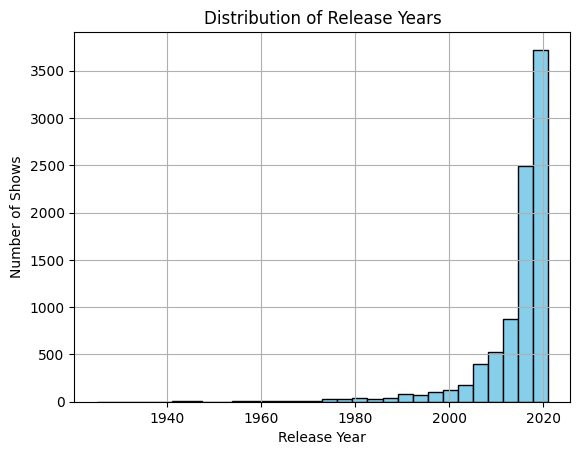

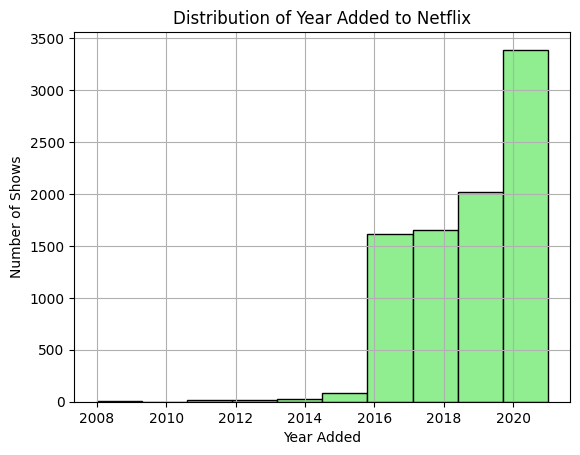

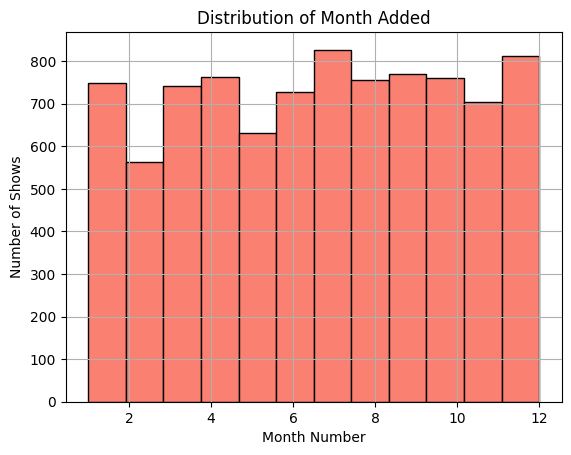

In [17]:
plt.hist(df['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

# Histogram - Year Added
plt.hist(df['year_added'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Year Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

# Histogram - Month Added
plt.hist(df['month_added'], bins=12, color='salmon', edgecolor='black')
plt.title('Distribution of Month Added')
plt.xlabel('Month Number')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()


**Distribution of Release Years**:There is a clear upward trend in content production, especially from the year 2000 onward.

The peak occurs around 2018–2020, suggesting an aggressive expansion of content in recent years.
**Distribution of Year  Added to Netflix**:Most content was added between 2016 and 2020, with a sharp rise in 2019 and 2020.

This indicates Netflix's rapid content acquisition during those years.
**Distribution of Month Added to Netflix**:New shows were added fairly consistently across all months.

Slight peaks are observed in June, August, and December, possibly aligning with mid-year and holiday season release strategies.
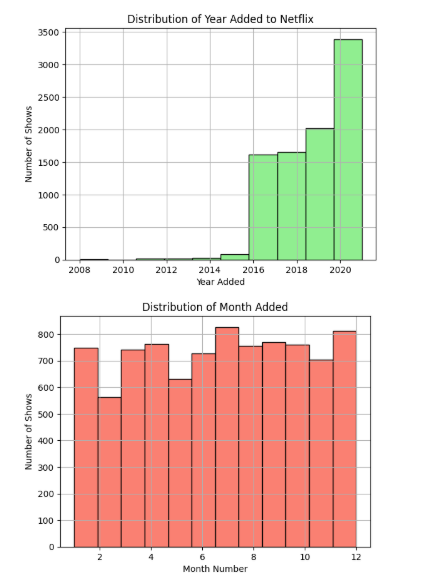

**Pie Chart- Distribution of Content Types**

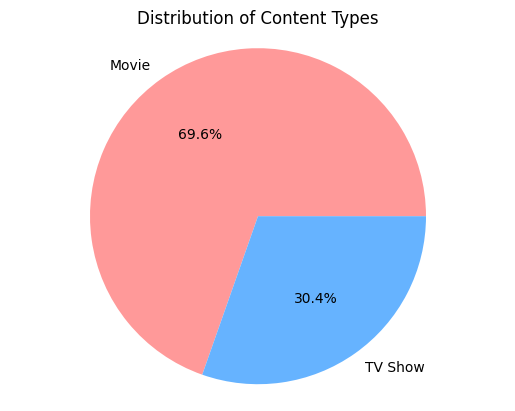

In [18]:
type_counts = df['type'].value_counts()

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#FF9999','#66B3FF'])
plt.title('Distribution of Content Types')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()

Movies dominate the platform, making up approximately 69.6% of all content.

TV Shows account for 30.4%.

**what are the top 10 countries with most shows**

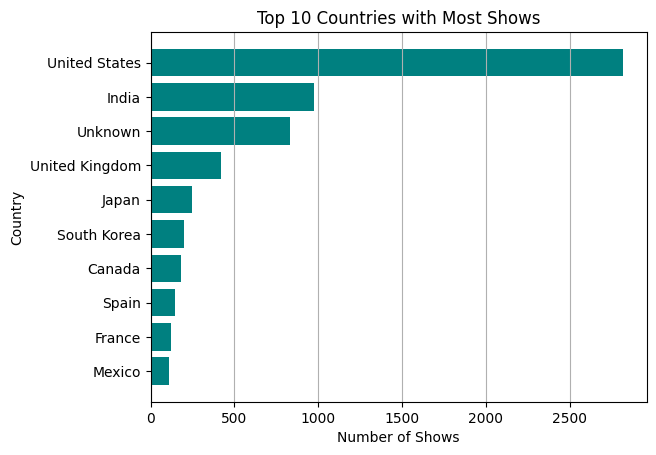

In [19]:
top_countries = df['country'].value_counts().head(10)

plt.barh(top_countries.index[::-1], top_countries.values[::-1], color='teal')
plt.title('Top 10 Countries with Most Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

United States has the highest number of shows.

India comes second, followed by a group labeled as "Unknown" (where the country wasn't listed).

**how many shows are added per month in each year**

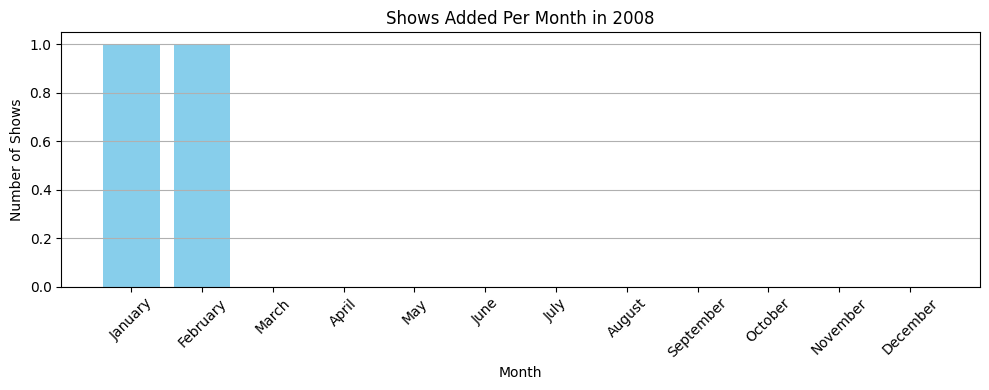

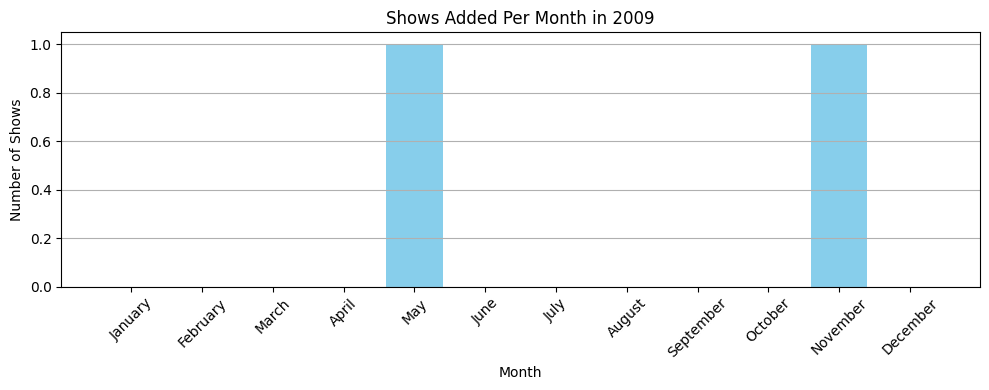

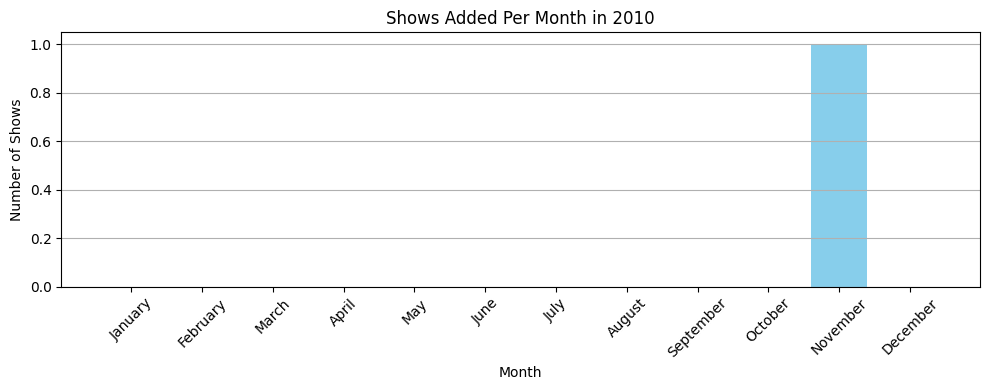

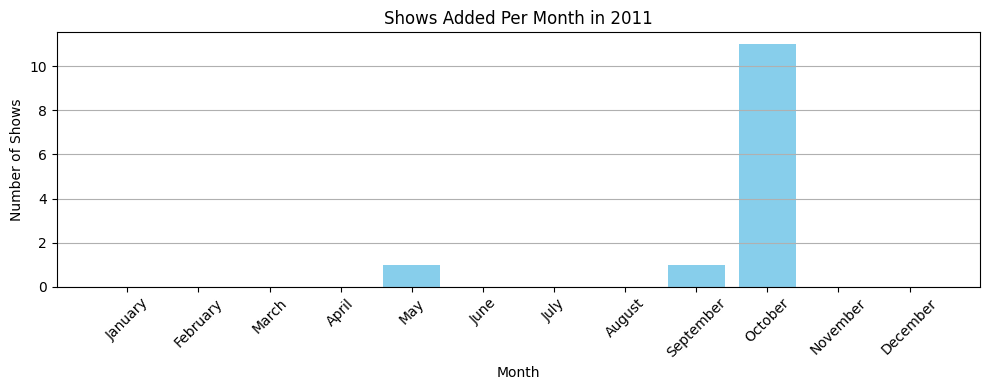

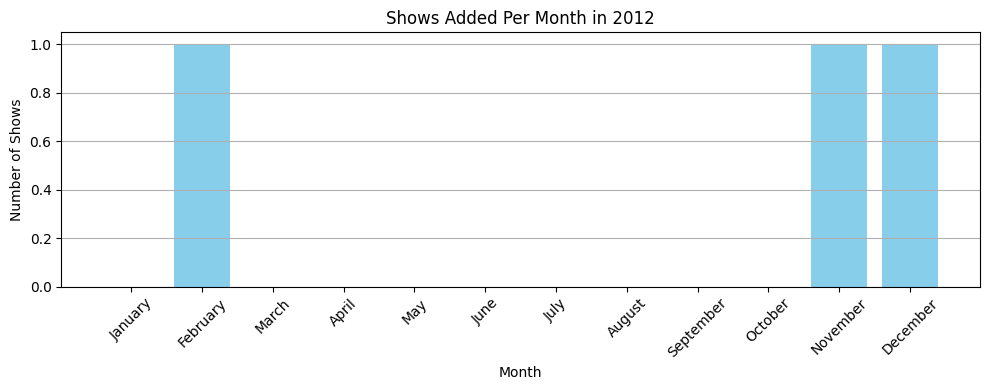

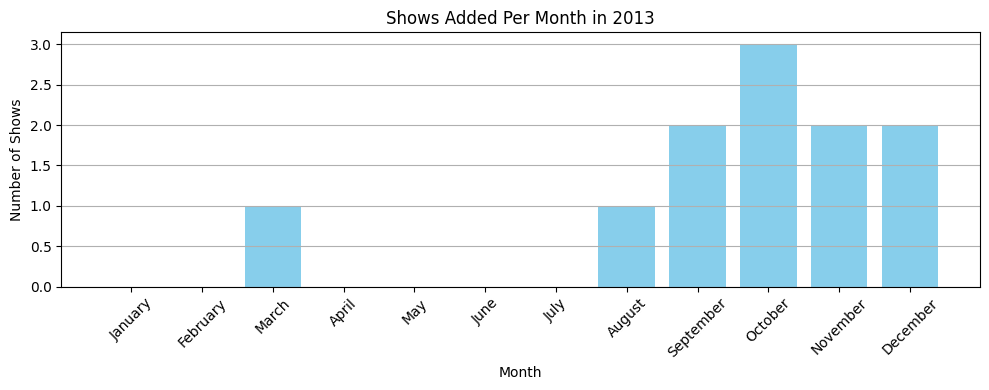

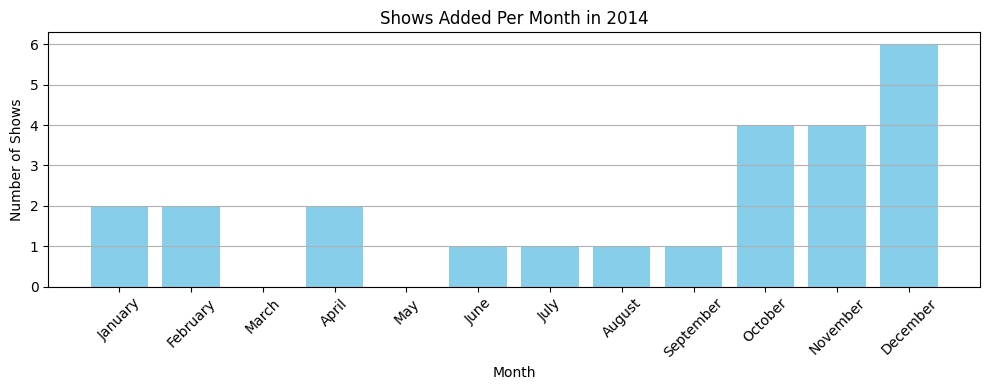

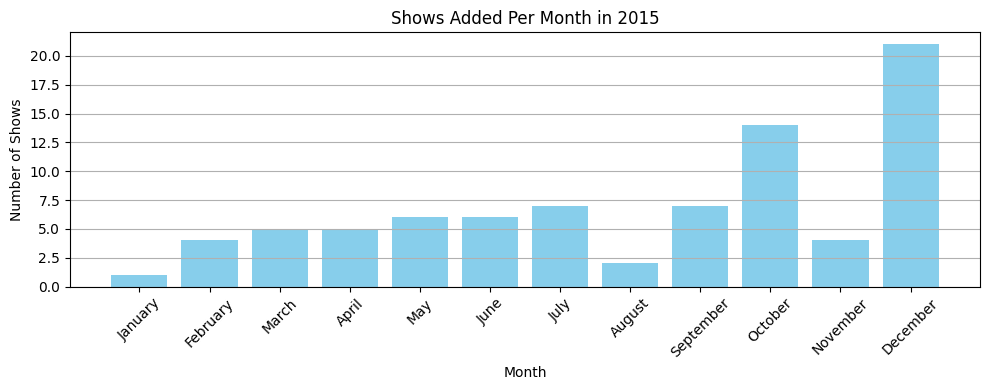

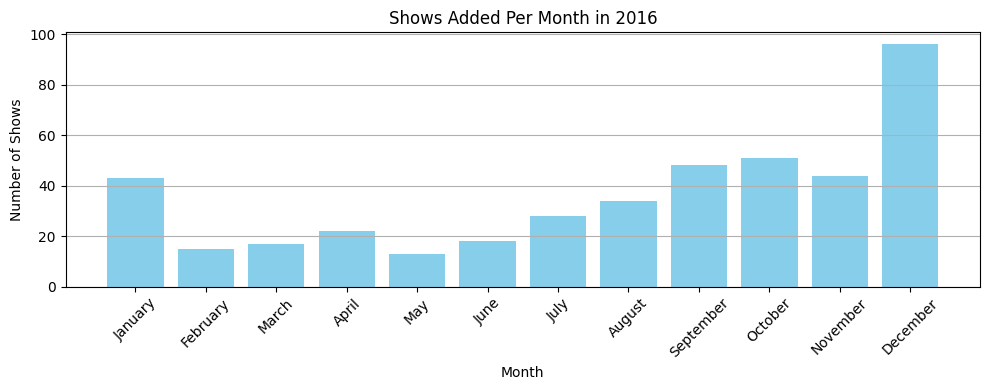

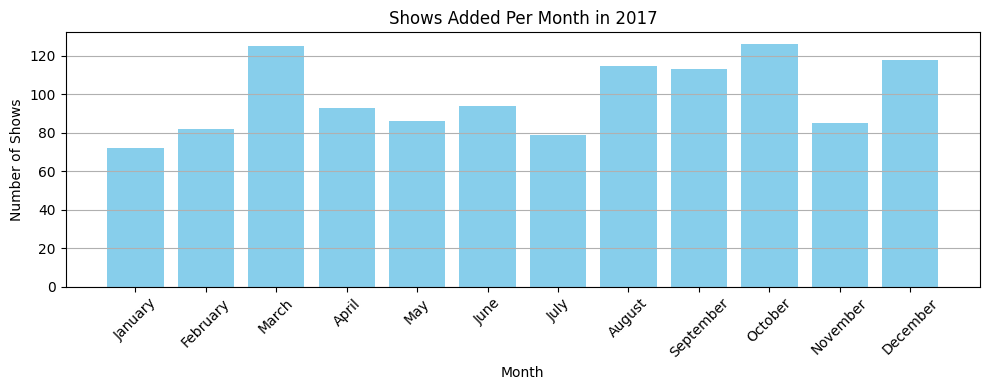

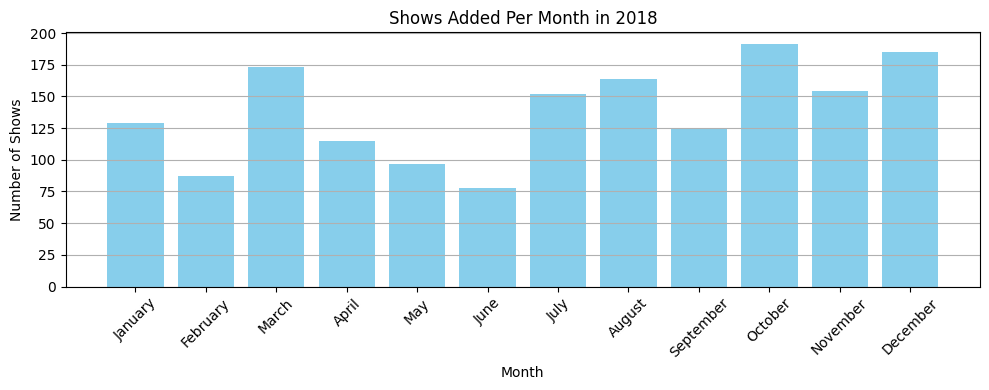

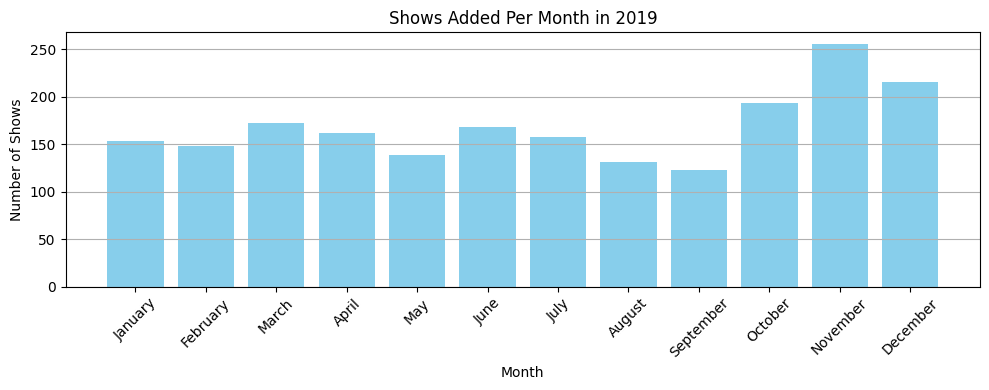

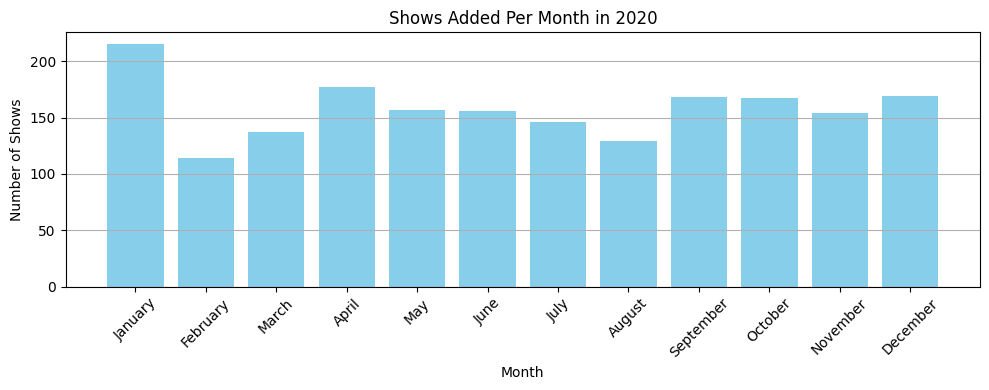

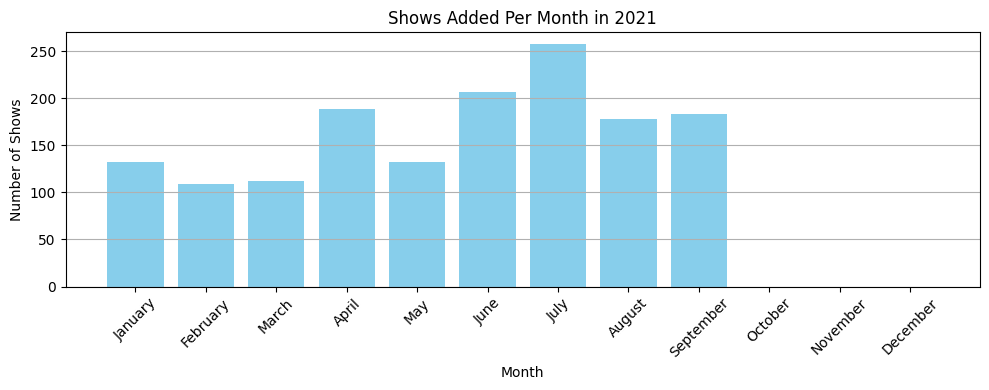

In [20]:
# Step 1: Group the data by year and month and count how many shows were added
monthly_by_year = df.groupby(['year_added', 'month_name']).size().unstack(fill_value=0)
# Step 2: Define the order of months (so they appear Jan to Dec, not alphabetical)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_by_year = monthly_by_year[month_order]
# Step 3: Create one bar chart per year
for year in monthly_by_year.index:     # Loop through each year (like 2018, 2019, 2020...)
    plt.figure(figsize=(10, 4))        # Set size of the chart
    plt.bar(month_order, monthly_by_year.loc[year], color='skyblue')  # Bar chart of that year
    plt.title(f'Shows Added Per Month in {year}')  # Title for the chart
    plt.xlabel('Month')                # X-axis label
    plt.ylabel('Number of Shows')      # Y-axis label
    plt.xticks(rotation=45)            # Rotate month names
    plt.grid(axis='y')                 # Add horizontal lines
    plt.tight_layout()                 # Adjust spacing
    plt.show()                         # Display the chart


We can see from the years 2008-2014 every year, in only few months content was added, since 2014 significant growth addition every month without missing is seen, in 2019, 2020 even 250 shows added some months.

**Which ratings are most common on Netflix?**

In [21]:
df['rating'].value_counts()

rating
TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

**which directors have most shows in netflix**

In [22]:
df['director'].value_counts().head(10)

director
Not Available             2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

**Number of Movies and TV Shows by Release Year**

<Axes: xlabel='release_year'>

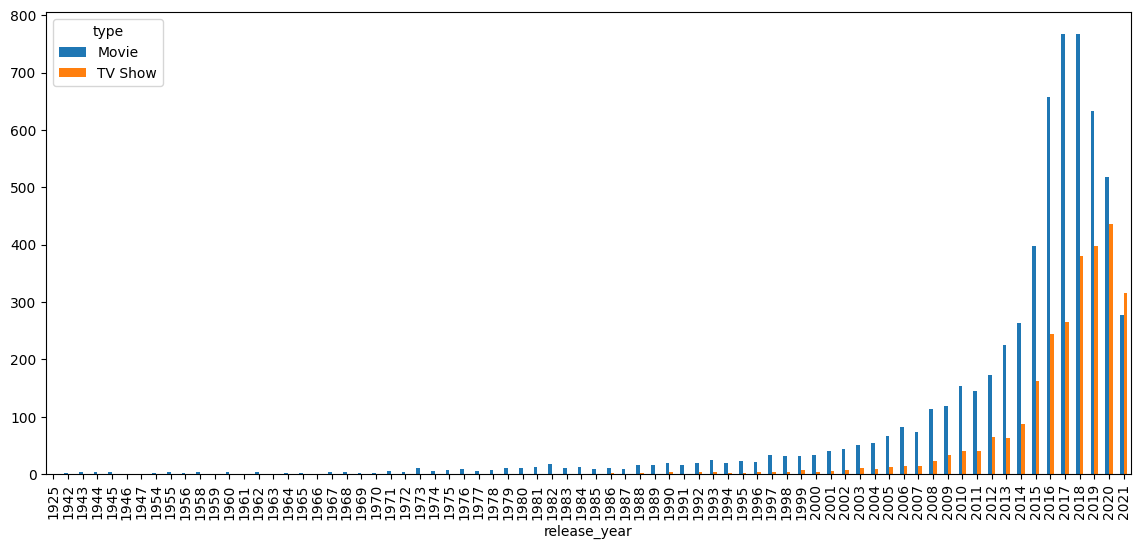

In [23]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='bar', figsize=(14,6))


The blue bars represent Movies, and the orange bars represent TV Shows.

Starting around the year 2000, both Movies and TV Shows began increasing rapidly.

The highest numbers were seen after 2015, especially around 2018–2020.

in Covid Lockdown most movies released in netflix due to lockdown

**Line Chart- Number of Shows Added to Netflix Each Year**

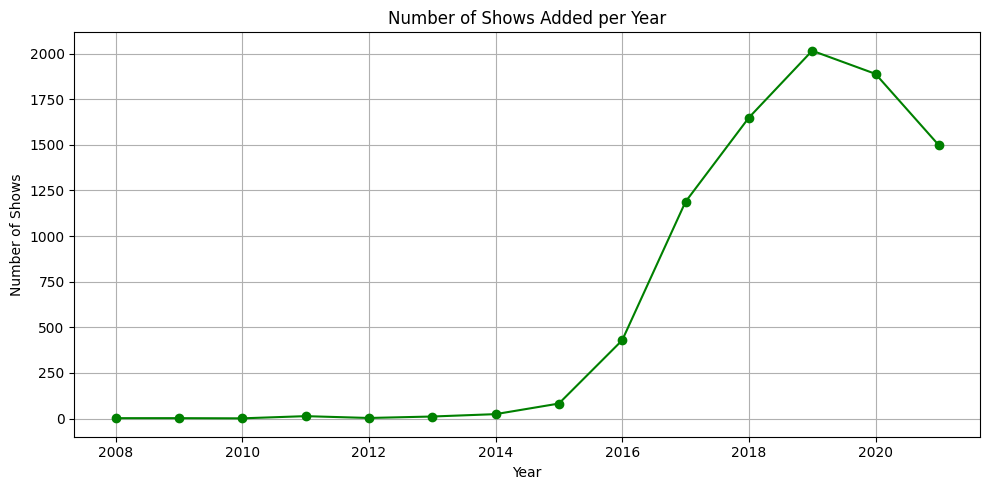

In [24]:
yearly_adds = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_adds.index, yearly_adds.values, marker='o', color='green')
plt.title('Number of Shows Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid()
plt.tight_layout()
plt.show()

**what are the movies and shows with top 10 durations**

In [25]:
# Movies
movie_durations = df[df['type'] == 'Movie']['duration'].value_counts().head(10)
print("Top 10 Movie Durations:\n", movie_durations)

# TV Shows
tv_durations = df[df['type'] == 'TV Show']['duration'].value_counts().head(10)
print("\nTop 10 TV Show Durations:\n", tv_durations)


Top 10 Movie Durations:
 duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
Name: count, dtype: int64

Top 10 TV Show Durations:
 duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
Name: count, dtype: int64


**What are the most common genres available on Netflix, and how many titles are there in each of these top categories?**

In [26]:
df['genres'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genres')

genre_counts = df_exploded['genres'].value_counts()
print(genre_counts)


genres
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                

**Top 15 genres in netflix**

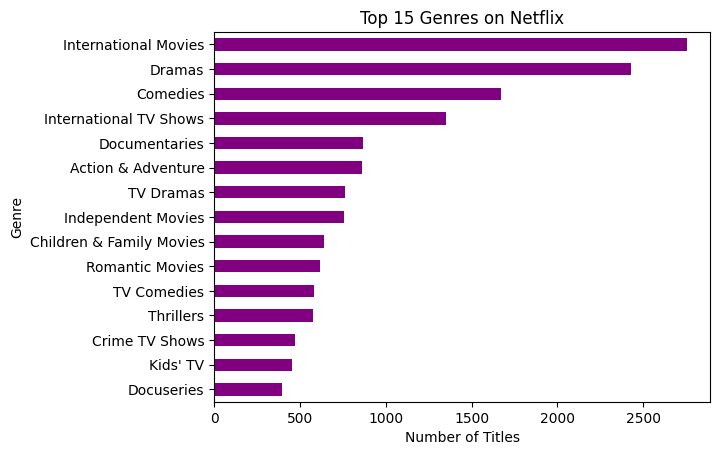

In [27]:
genre_counts.head(15).plot(kind='barh', color='purple')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 15 Genres on Netflix')
plt.gca().invert_yaxis()  # For better visual layout
plt.show()

- International Movies is the most represented genre with nearly 2800 titles.
- Dramas follow closely with around 2450 titles.
- Other prominent genres include:
  - Comedies (1670 titles)
  - International TV Shows (1350 titles)
  - Documentaries and Action & Adventure (each with 850–870 titles)

# Summary 
The dataset includes 8,807 Netflix titles with information such as type, release year, genre, director, duration, and date added, spanning from 2008 to 2021.

Most titles were added between 2018 and 2020, with the highest additions in 2019 and 2020, especially during the COVID-19 lockdown period.

Content releases increased significantly from 2014 onward, peaking around 2018–2020, showing Netflix's growing focus on adding new content.

Movies make up the majority of content at about 69.6%, while TV Shows account for 30.4%.

The United States has the highest number of titles, followed by India and an "Unknown" category where the country wasn’t listed.

TV-MA is the most common content rating, followed by TV-14 and TV-PG, indicating a large amount of content suitable for mature and teen audiences.

Many titles don’t list a director, but the most frequently credited one is Rajiv Chilaka, known for children’s content.

International Movies and Dramas are the most popular genres, and most movies have a duration around 90–95 minutes, while most TV shows run for just 1 or 2 seasons.

**The data shows Netflix rapidly expanded its content library between 2018 and 2020, focusing heavily on movies and international genres. This growth aligns with increased global demand and the impact of the COVID-19 lockdown on content consumption.**